In [1]:
library(sf)
library(ggplot2)
library(tidyverse)
library(tibble)
library(magrittr)
library(redist)
library(sp)
library(spData)
library(spdep)
library(igraph)

ff_2015_file <- "C:/Users/madie/OneDrive/data/pre-redist/VA_precinct_2015_fairfax/VA_precinct_2015_fairfax.shp"
df <- st_read(ff_2015_file)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from

Reading layer `VA_precinct_2015_fairfax' from data source `C:\Users\madie\OneDrive\data\pre-redist\VA_precinct_2015_fairfax\VA_precinct_2015_fairfax.shp' using driver `ESRI Shapefile'
Simple feature collection with 253 features and 14 fields
geometry type:  POLYGON
dimension:      XYZ
bbox:           xmin: 11757190 ymin: 6905741 xmax: 11899000 ymax: 7070364
z_range:        zmin: 0 zmax: 0
projected CRS:  NAD83 / Virginia North (ftUS)


In [2]:
# generate adjacency list
adjlist <- redist.adjacency(df)

In [3]:
mcmc.out <- redist.mcmc(adjobj = adjlist,
                        popvec = df$pop,
                        ndists = 3,
                        nsims = 10000)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.957958

20 percent done.
Metropolis acceptance ratio: 0.953977

30 percent done.
Metropolis acceptance ratio: 0.952317

40 percent done.
Metropolis acceptance ratio: 0.954489

50 percent done.
Metropolis acceptance ratio: 0.952791

60 percent done.
Metropolis acceptance ratio: 0.951825

70 percent done.
Metropolis acceptance ratio: 0.95185

80 percent done.
Metropolis acceptance ratio: 0.951494

90 percent done.
Metropolis acceptance ratio: 0.95255

100 percent done.
Metropolis acceptance ratio: 0.952195



In [4]:
head(mcmc.out)

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,...,0,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [30]:
# transpose partitions (one row is one map) and turn into data frame
maps <- as.data.frame(t(mcmc.out$partitions))
# add column representing the distance parity (how far off the population is)
maps$pop_parity = mcmc.out$distance_parity
# filter out all maps (rows) that are over the parity of 20%
maps <- maps %>% filter(pop_parity <= 0.2)
# remove pop_parity and transpose back
partitions_valid_pop <- t(data.matrix(subset(maps, select = -pop_parity)))

In [33]:
head(partitions_valid_pop)

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,70
V1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
V3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
V4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
V5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2
V6,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# calculate compactness measures for these valid population partitions
compact <- redist.compactness(district_membership = partitions_valid_pop, shp = df)

In [42]:
# reformat so that columns are the districts, rows are maps, and values are polysby popper compactness score
compacter <- compact %>%
            pivot_wider(names_from = districts, values_from = PolsbyPopper) %>%
            # rename columns so that they have string names
            rename(c("map"="nloop", "dist_0"="0", "dist_1"="1", "dist_2"="2")) %>%
            # calculate mean polsby popper score
            group_by(map) %>% mutate(mean = (dist_0 + dist_1 + dist_2)/3) 

In [60]:
best_map <- which.max(compacter$mean)

In [61]:
library(randomcoloR)
colors <- distinctColorPalette(k=3)

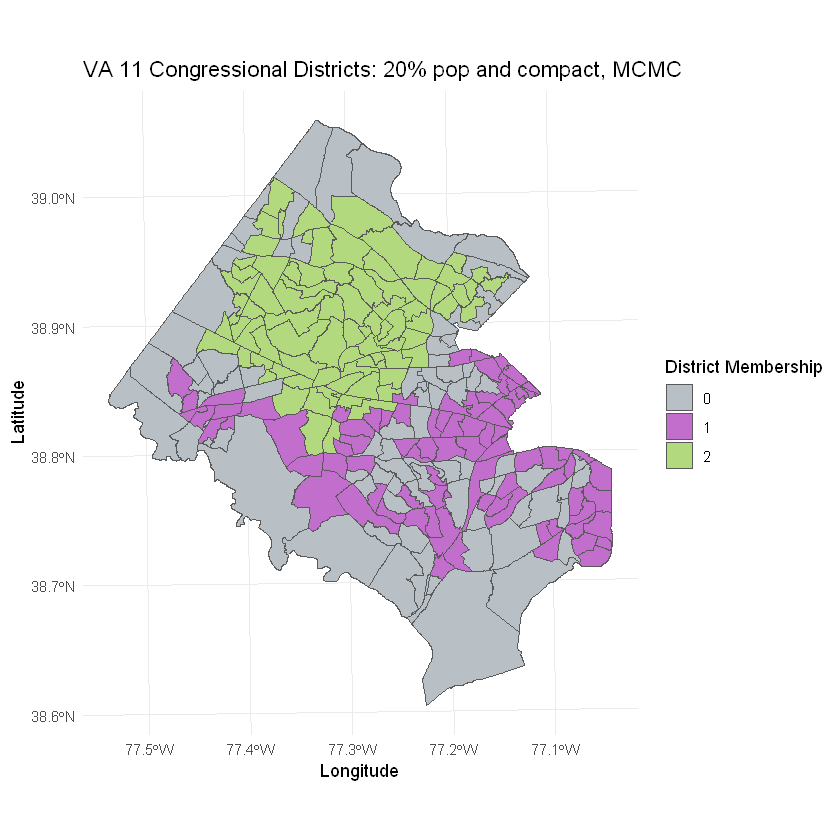

In [62]:
cds <- mcmc.out$partitions[,best_map]
plot <- redist.map(shp=df, 
        district_membership=cds, 
        centroids=FALSE, 
        edges=FALSE,
        title="VA 11 Congressional Districts: 20% pop and compact, MCMC") +
        theme(legend.position="right") +
        scale_fill_manual(values = colors)
        # geom_sf_label(aes(label = cds))
#ggsave("fairfax_10.png")
plot